In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [4]:
from google.colab import files
uploaded = files.upload()

Saving imdb_top_1000.csv to imdb_top_1000.csv


In [5]:
import pandas as pd
import io

imdb_df = pd.read_csv(io.BytesIO(uploaded['imdb_top_1000.csv']))
imdb_df.head()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


In [6]:
imdb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    1000 non-null   object 
 1   Series_Title   1000 non-null   object 
 2   Released_Year  1000 non-null   object 
 3   Certificate    899 non-null    object 
 4   Runtime        1000 non-null   object 
 5   Genre          1000 non-null   object 
 6   IMDB_Rating    1000 non-null   float64
 7   Overview       1000 non-null   object 
 8   Meta_score     843 non-null    float64
 9   Director       1000 non-null   object 
 10  Star1          1000 non-null   object 
 11  Star2          1000 non-null   object 
 12  Star3          1000 non-null   object 
 13  Star4          1000 non-null   object 
 14  No_of_Votes    1000 non-null   int64  
 15  Gross          831 non-null    object 
dtypes: float64(2), int64(1), object(13)
memory usage: 125.1+ KB


In [7]:
imdb_df.describe()

,IMDB_Rating,Meta_score,No_of_Votes
count,1000.000000,843.000000,1.000000e+03
mean,7.949300,77.971530,2.736929e+05
std,0.275491,12.376099,3.273727e+05
min,7.600000,28.000000,2.508800e+04
25%,7.700000,70.000000,5.552625e+04
50%,7.900000,79.000000,1.385485e+05
75%,8.100000,87.000000,3.741612e+05
max,9.300000,100.000000,2.343110e+06


In [8]:
imdb_df.columns

Index(['Poster_Link', 'Series_Title', 'Released_Year', 'Certificate',
       'Runtime', 'Genre', 'IMDB_Rating', 'Overview', 'Meta_score', 'Director',
       'Star1', 'Star2', 'Star3', 'Star4', 'No_of_Votes', 'Gross'],
      dtype='object')

<Axes: >

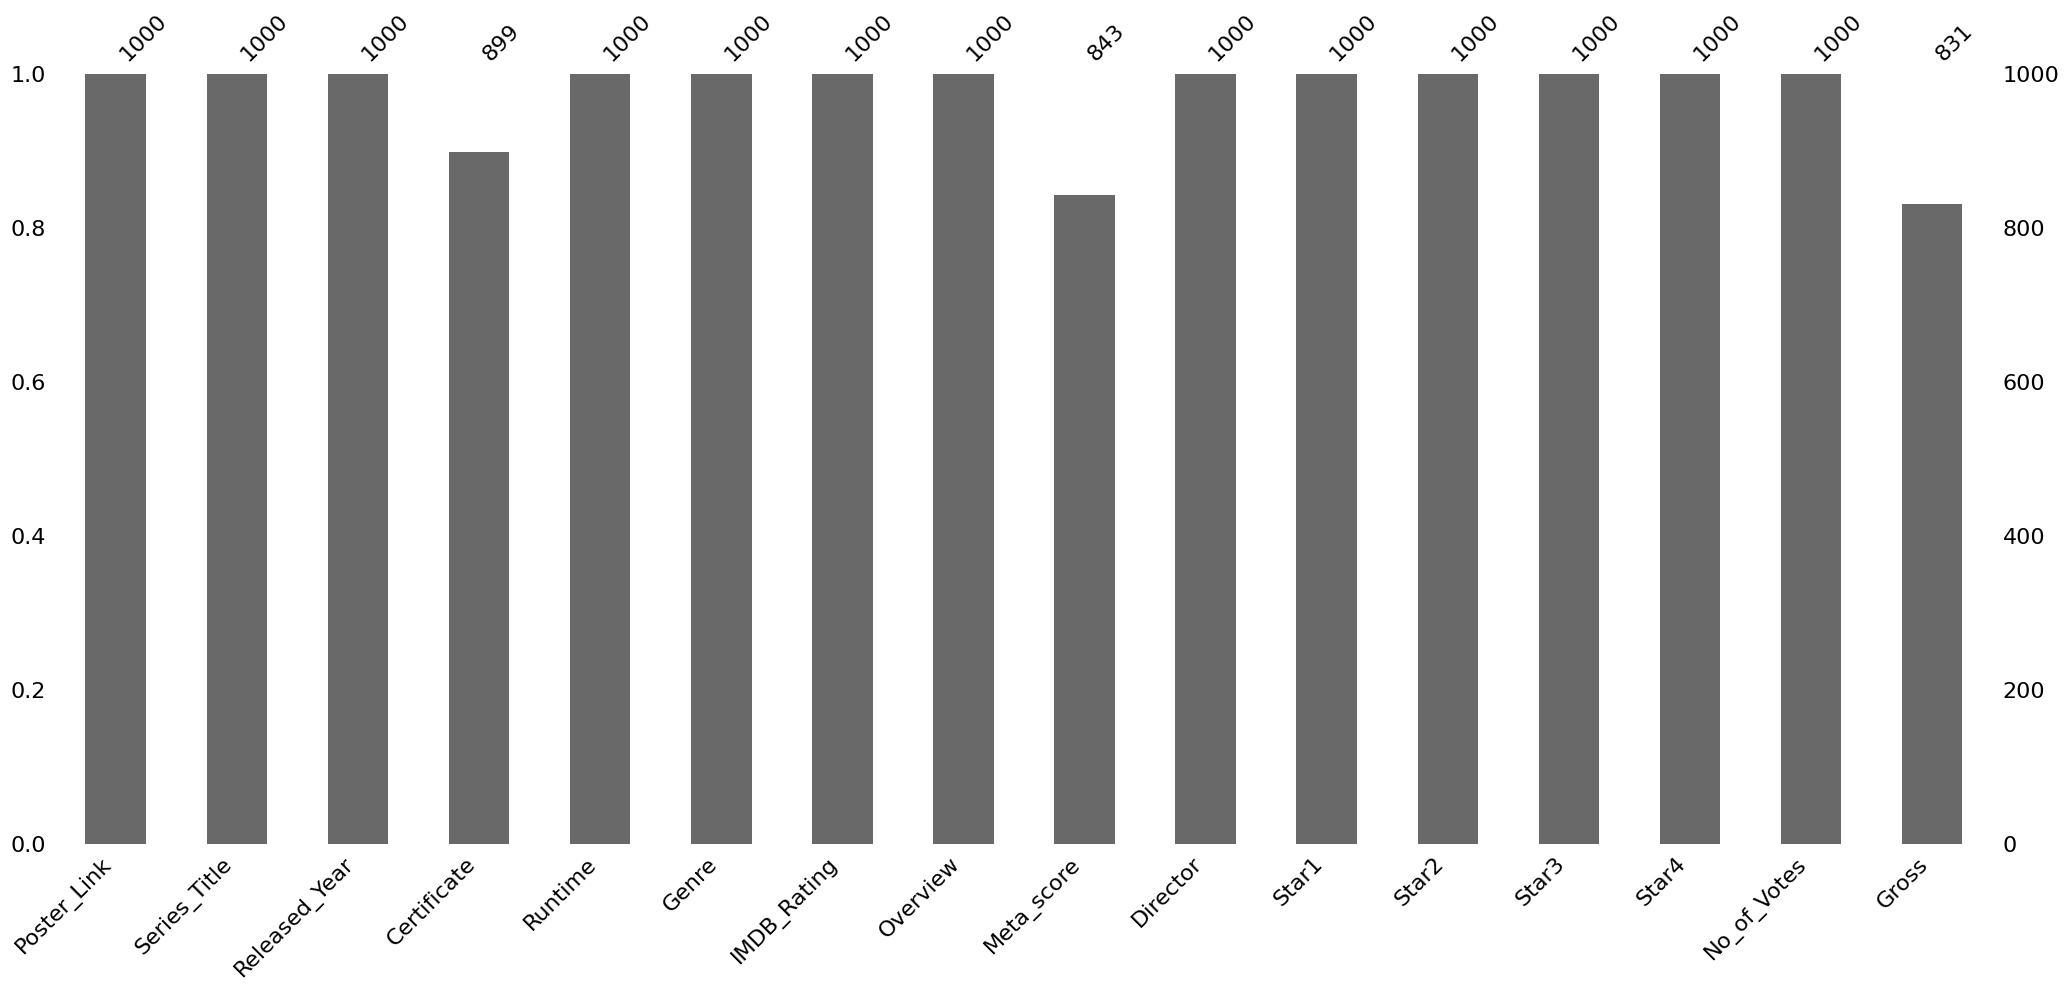

In [9]:
import missingno as mn
mn.bar(imdb_df)

<Axes: >

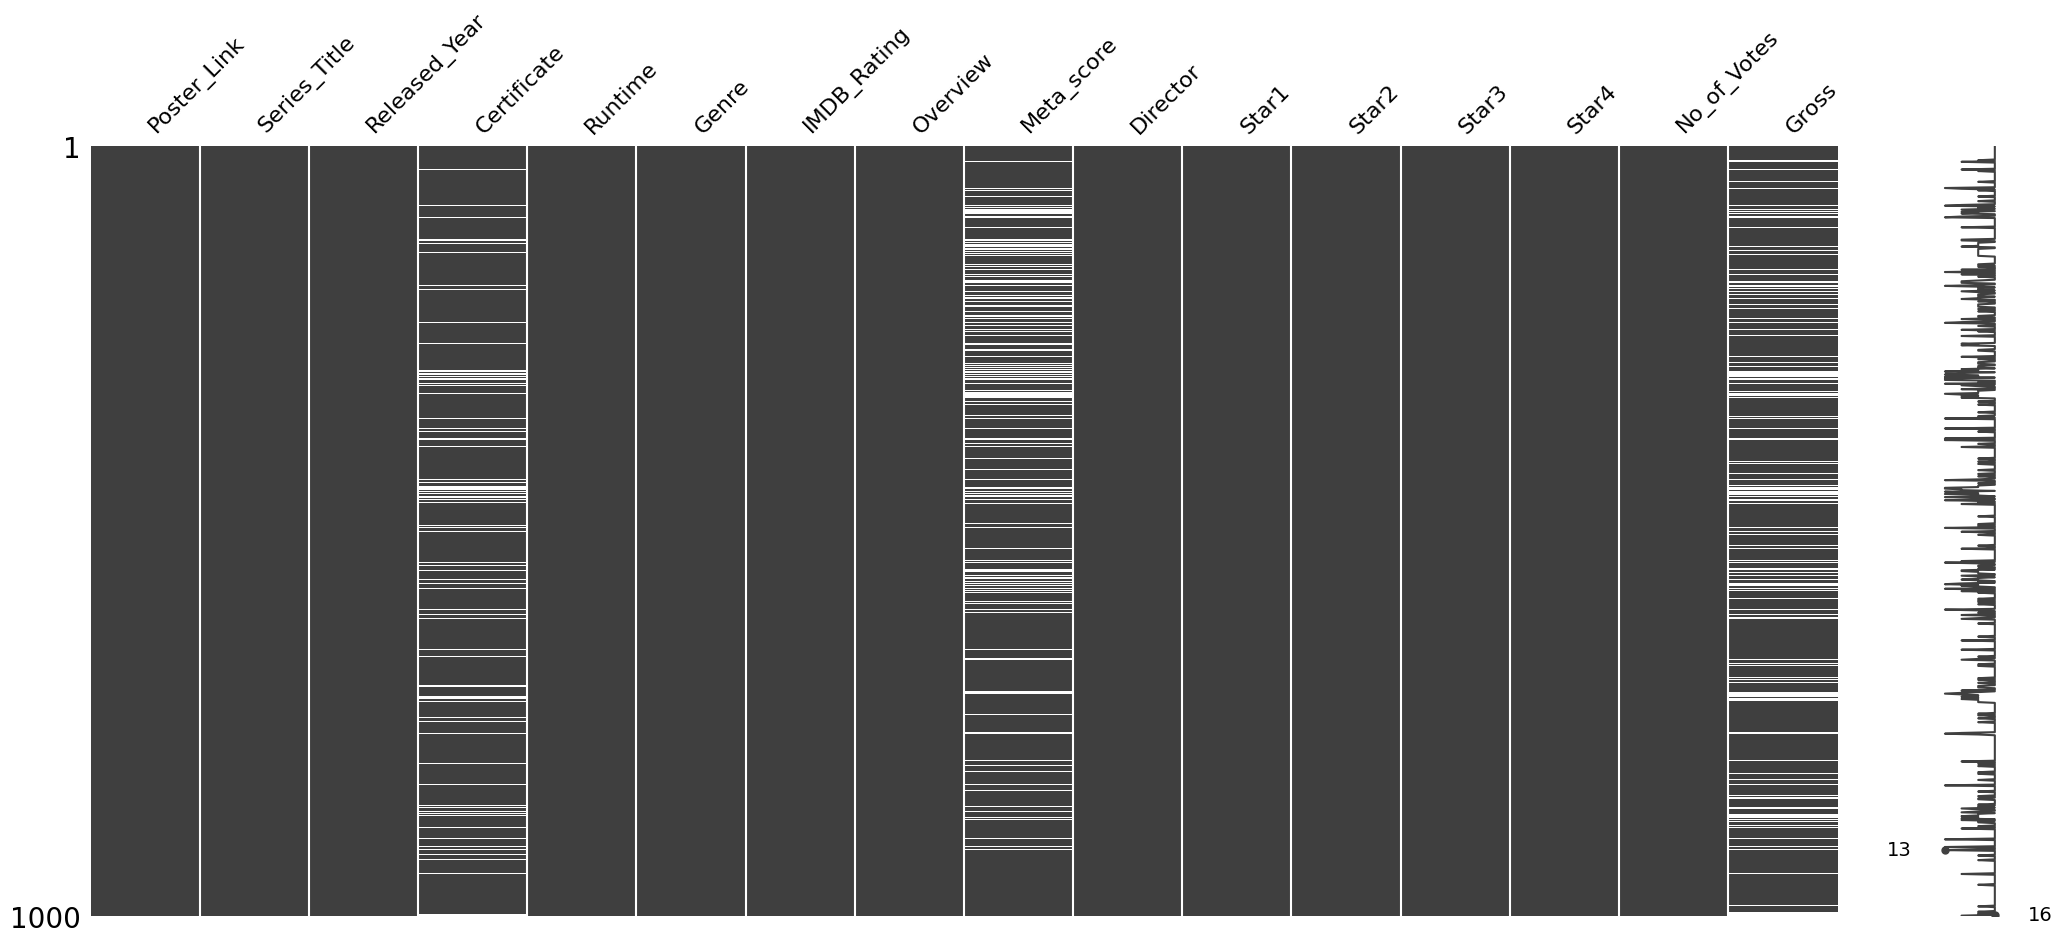

In [10]:
mn.matrix(imdb_df)

In [11]:
imdb_df.dropna().shape

(714, 16)

In [12]:
# Handling missing values
# Filling missing 'Certificate' with 'Not Rated'
imdb_df['Certificate'] = imdb_df['Certificate'].fillna('Not Rated')

In [13]:
imdb_df.dropna(inplace = True)
imdb_df.shape

(750, 16)

In [14]:
type(imdb_df['Released_Year'][0])

str

In [15]:
# Converting 'Released_Year' to numeric, coercing errors to NaN
imdb_df['Released_Year'] = pd.to_numeric(imdb_df['Released_Year'], errors='coerce')

In [16]:
imdb_df['Runtime'][0]

'142 min'

In [17]:
# Converting 'Runtime' to integer (removing 'min' and converting)
imdb_df['Runtime'] = imdb_df['Runtime'].str.replace(' min', '').astype(float)

In [18]:
imdb_df['Gross'][0]

'28,341,469'

In [19]:
# Remove commas and convert to float
imdb_df['Gross'] = pd.to_numeric(imdb_df['Gross'].str.replace(',', ''), errors='coerce')

In [20]:
imdb_df

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994.0,A,142.0,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,28341469
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972.0,A,175.0,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008.0,UA,152.0,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974.0,A,202.0,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,57300000
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957.0,U,96.0,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,4360000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
990,https://m.media-amazon.com/images/M/MV5BYjRmY2...,Giù la testa,1971.0,PG,157.0,"Drama, War, Western",7.6,A low-life bandit and an I.R.A. explosives exp...,77.0,Sergio Leone,Rod Steiger,James Coburn,Romolo Valli,Maria Monti,30144,696690
991,https://m.media-amazon.com/images/M/MV5BMzAyND...,Kelly's Heroes,1970.0,GP,144.0,"Adventure, Comedy, War",7.6,A group of U.S. soldiers sneaks across enemy l...,50.0,Brian G. Hutton,Clint Eastwood,Telly Savalas,Don Rickles,Carroll O'Connor,45338,1378435
992,https://m.media-amazon.com/images/M/MV5BMjAwMT...,The Jungle Book,1967.0,U,78.0,"Animation, Adventure, Family",7.6,Bagheera the Panther and Baloo the Bear have a...,65.0,Wolfgang Reitherman,Phil Harris,Sebastian Cabot,Louis Prima,Bruce Reitherman,166409,141843612
994,https://m.media-amazon.com/images/M/MV5BZjQyMG...,A Hard Day's Night,1964.0,U,87.0,"Comedy, Music, Musical",7.6,"Over two ""typical"" days in the life of The Bea...",96.0,Richard Lester,John Lennon,Paul McCartney,George Harrison,Ringo Starr,40351,13780024


Data Visualization

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

In [22]:
import warnings
warnings.filterwarnings('ignore')

Distribution of IMDB Ratings

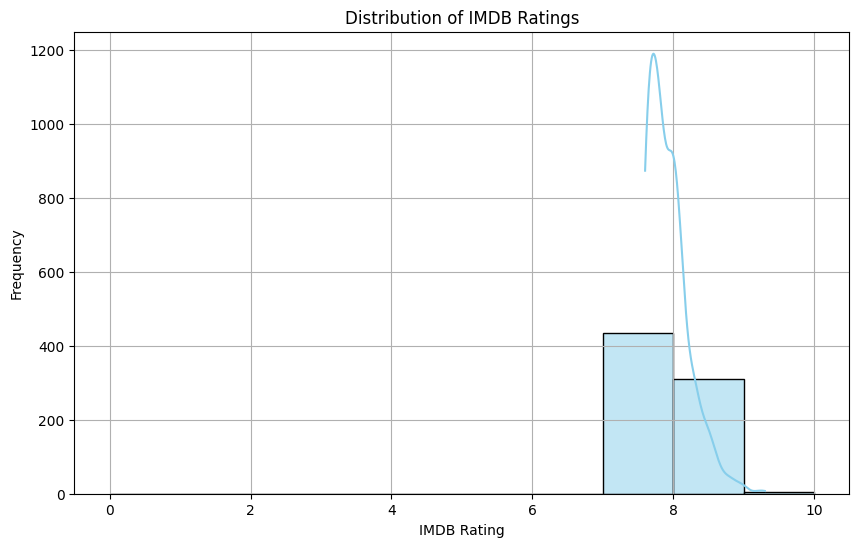

In [23]:
# IMDB Rating Distribution
plt.figure(figsize=(10, 6))
sns.histplot(imdb_df['IMDB_Rating'], bins=[0,1,2,3,4,5,6,7,8,9,10], kde=True, color='skyblue')
plt.title('Distribution of IMDB Ratings')
plt.xlabel('IMDB Rating')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

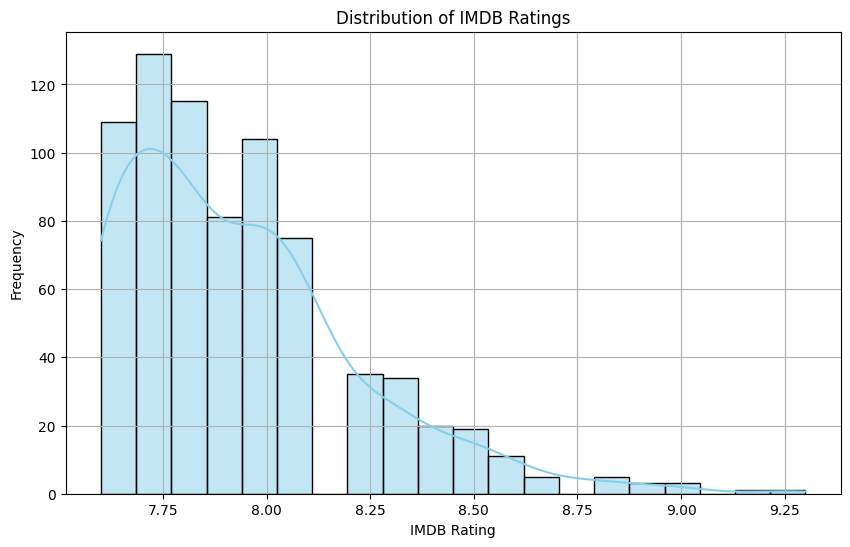

In [24]:
# IMDB Rating Distribution
plt.figure(figsize=(10, 6))
sns.histplot(imdb_df['IMDB_Rating'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of IMDB Ratings')
plt.xlabel('IMDB Rating')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [25]:
imdb_df['Director'].value_counts()

,count
Director,
Steven Spielberg,13
Martin Scorsese,10
Alfred Hitchcock,9
Christopher Nolan,8
Clint Eastwood,8
...,...
Neill Blomkamp,1
Tomas Alfredson,1
Duncan Jones,1


Top 10 Directors by Movie Count

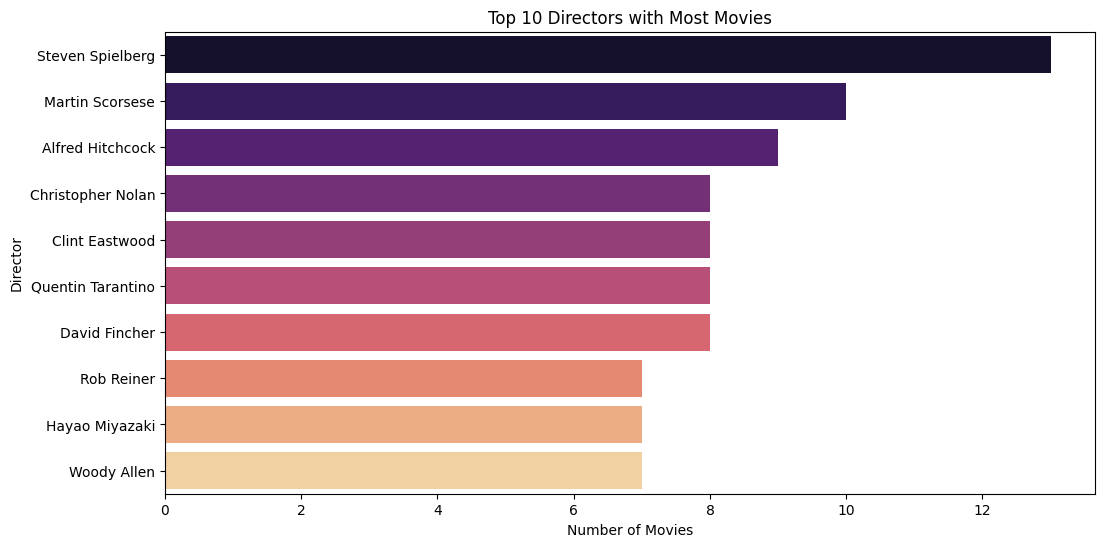

In [26]:
# Top 10 Directors by Movie Count
top_directors = imdb_df['Director'].value_counts().head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_directors.values, y=top_directors.index, palette='magma')
plt.title('Top 10 Directors with Most Movies')
plt.xlabel('Number of Movies')
plt.ylabel('Director')
plt.show()

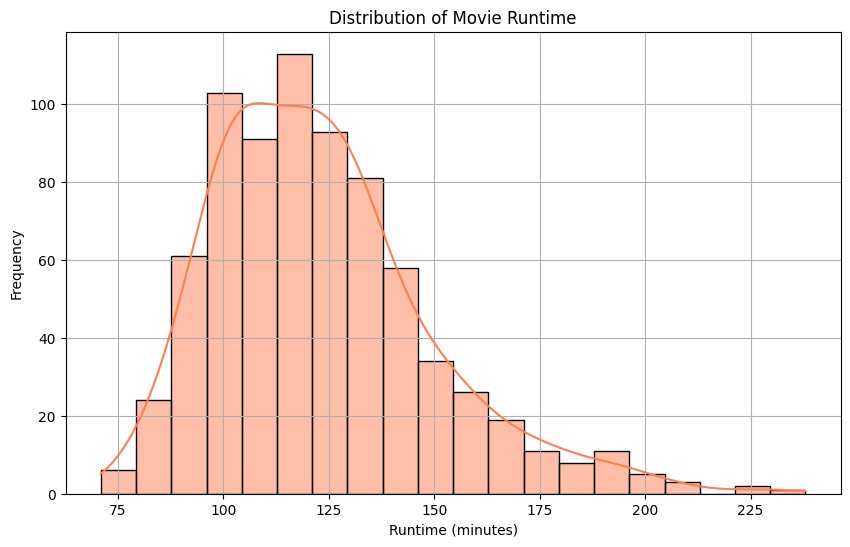

In [27]:
# Runtime Distribution
plt.figure(figsize=(10, 6))
sns.histplot(imdb_df['Runtime'], bins=20, kde=True, color='coral')
plt.title('Distribution of Movie Runtime')
plt.xlabel('Runtime (minutes)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [28]:
imdb_df['Released_Year'].value_counts()

,count
Released_Year,
2014.0,29
2004.0,28
2013.0,24
2009.0,24
2001.0,24
...,...
1944.0,1
1931.0,1
1936.0,1


In [29]:
imdb_df['Released_Year'].value_counts().sort_index()

,count
Released_Year,
1925.0,1
1927.0,1
1930.0,1
1931.0,1
1933.0,1
...,...
2015.0,19
2016.0,20
2017.0,19


Number of Movies Released Per Year

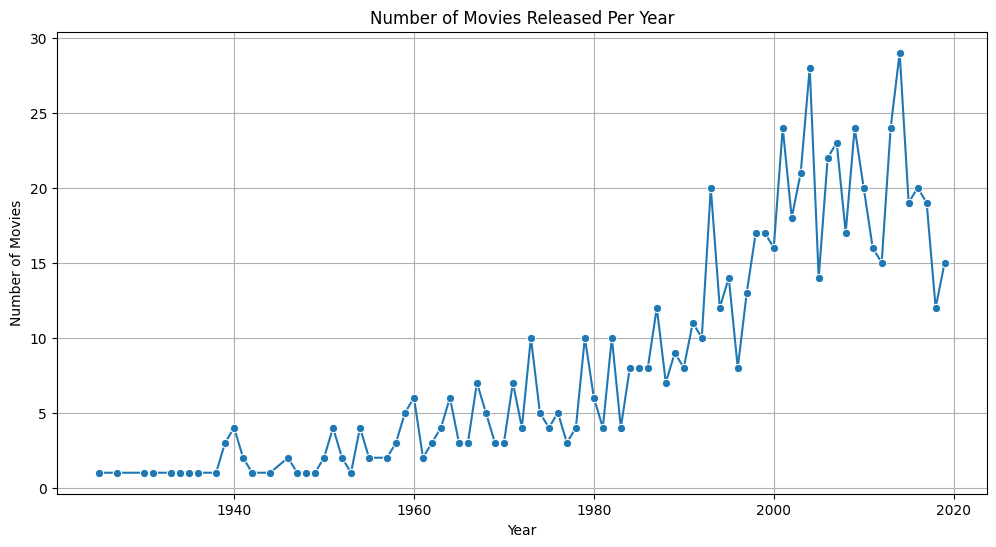

In [30]:
# Number of Movies Released Per Year
plt.figure(figsize=(12, 6))
yearly_movies = imdb_df['Released_Year'].value_counts().sort_index()
sns.lineplot(x=yearly_movies.index, y=yearly_movies.values, marker='o')
plt.title('Number of Movies Released Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.grid(True)
plt.show()

In [31]:
# imdb_df.nsmallest(10, 'Gross')
imdb_df.nlargest(10, 'Gross')

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
477,https://m.media-amazon.com/images/M/MV5BOTAzOD...,Star Wars: Episode VII - The Force Awakens,2015.0,U,138.0,"Action, Adventure, Sci-Fi",7.9,"As a new threat to the galaxy rises, Rey, a de...",80.0,J.J. Abrams,Daisy Ridley,John Boyega,Oscar Isaac,Domhnall Gleeson,860823,936662225
59,https://m.media-amazon.com/images/M/MV5BMTc5MD...,Avengers: Endgame,2019.0,UA,181.0,"Action, Adventure, Drama",8.4,After the devastating events of Avengers: Infi...,78.0,Anthony Russo,Joe Russo,Robert Downey Jr.,Chris Evans,Mark Ruffalo,809955,858373000
623,https://m.media-amazon.com/images/M/MV5BMTYwOT...,Avatar,2009.0,UA,162.0,"Action, Adventure, Fantasy",7.8,A paraplegic Marine dispatched to the moon Pan...,83.0,James Cameron,Sam Worthington,Zoe Saldana,Sigourney Weaver,Michelle Rodriguez,1118998,760507625
60,https://m.media-amazon.com/images/M/MV5BMjMxNj...,Avengers: Infinity War,2018.0,UA,149.0,"Action, Adventure, Sci-Fi",8.4,The Avengers and their allies must be willing ...,68.0,Anthony Russo,Joe Russo,Robert Downey Jr.,Chris Hemsworth,Mark Ruffalo,834477,678815482
652,https://m.media-amazon.com/images/M/MV5BMDdmZG...,Titanic,1997.0,UA,194.0,"Drama, Romance",7.8,A seventeen-year-old aristocrat falls in love ...,75.0,James Cameron,Leonardo DiCaprio,Kate Winslet,Billy Zane,Kathy Bates,1046089,659325379
357,https://m.media-amazon.com/images/M/MV5BNDYxNj...,The Avengers,2012.0,UA,143.0,"Action, Adventure, Sci-Fi",8.0,Earth's mightiest heroes must come together an...,69.0,Joss Whedon,Robert Downey Jr.,Chris Evans,Scarlett Johansson,Jeremy Renner,1260806,623279547
891,https://m.media-amazon.com/images/M/MV5BMTEzNz...,Incredibles 2,2018.0,UA,118.0,"Animation, Action, Adventure",7.6,The Incredibles family takes on a new mission ...,80.0,Brad Bird,Craig T. Nelson,Holly Hunter,Sarah Vowell,Huck Milner,250057,608581744
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008.0,UA,152.0,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444
582,https://m.media-amazon.com/images/M/MV5BMjEwMz...,Rogue One,2016.0,UA,133.0,"Action, Adventure, Sci-Fi",7.8,The daughter of an Imperial scientist joins th...,65.0,Gareth Edwards,Felicity Jones,Diego Luna,Alan Tudyk,Donnie Yen,556608,532177324
63,https://m.media-amazon.com/images/M/MV5BMTk4OD...,The Dark Knight Rises,2012.0,UA,164.0,"Action, Adventure",8.4,Eight years after the Joker's reign of anarchy...,78.0,Christopher Nolan,Christian Bale,Tom Hardy,Anne Hathaway,Gary Oldman,1516346,448139099


Top 10 Grossing Movies

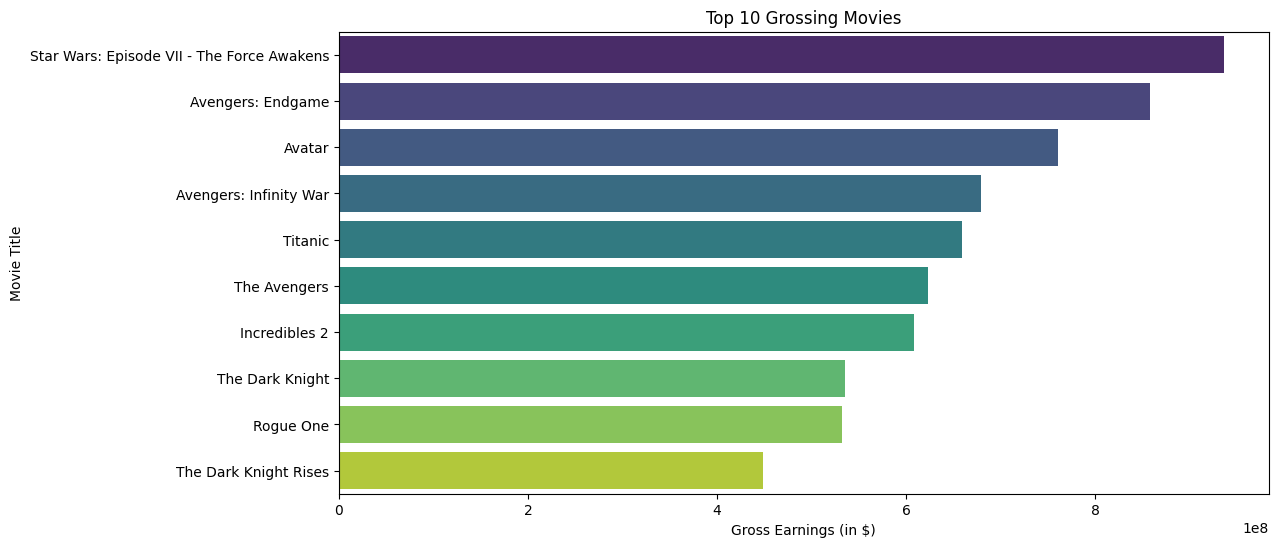

In [32]:
# Top 10 Grossing Movies
top_gross = imdb_df.nlargest(10, 'Gross')
plt.figure(figsize=(12, 6))
sns.barplot(x='Gross', y='Series_Title', data=top_gross, palette='viridis')
plt.title('Top 10 Grossing Movies')
plt.xlabel('Gross Earnings (in $)')
plt.ylabel('Movie Title')
plt.show()

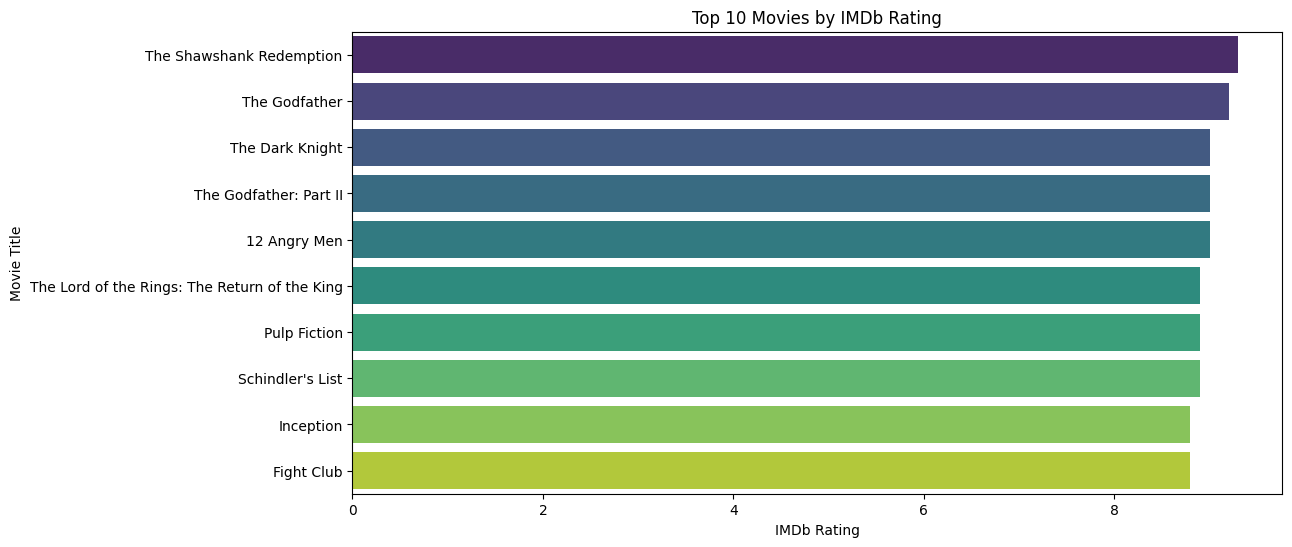

In [33]:
# Top 10 movies by IMDb rating
top_rated_movies = imdb_df.nlargest(10, 'IMDB_Rating')
plt.figure(figsize=(12, 6))
sns.barplot(data=top_rated_movies, x='IMDB_Rating', y='Series_Title', palette='viridis')
plt.title('Top 10 Movies by IMDb Rating')
plt.xlabel('IMDb Rating')
plt.ylabel('Movie Title')
plt.show()

Number of Movies Released Per Year

<Axes: xlabel='Released_Year'>

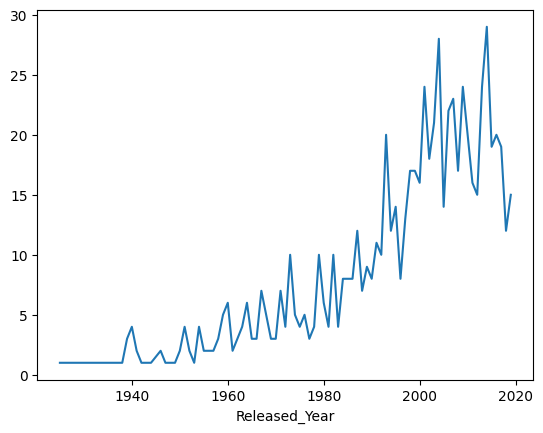

In [34]:
imdb_df['Released_Year'].value_counts().sort_index().plot()

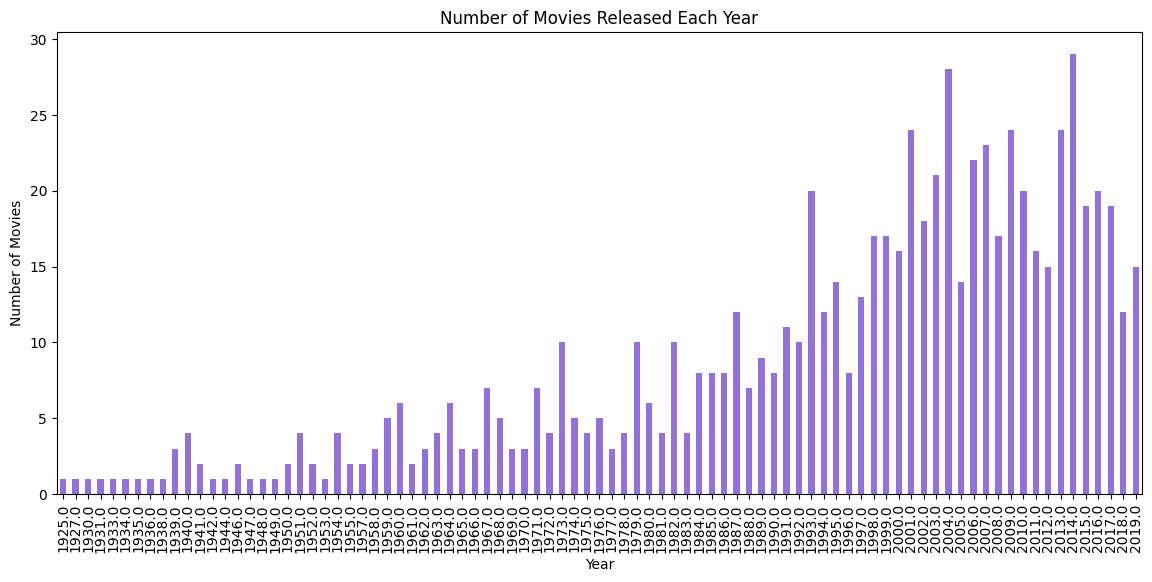

In [35]:
# Number of movies released per year
plt.figure(figsize=(14, 6))
imdb_df['Released_Year'].value_counts().sort_index().plot(kind='bar', color='mediumpurple')
plt.title('Number of Movies Released Each Year')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.show()

IMDb Rating VS Gross Earnings

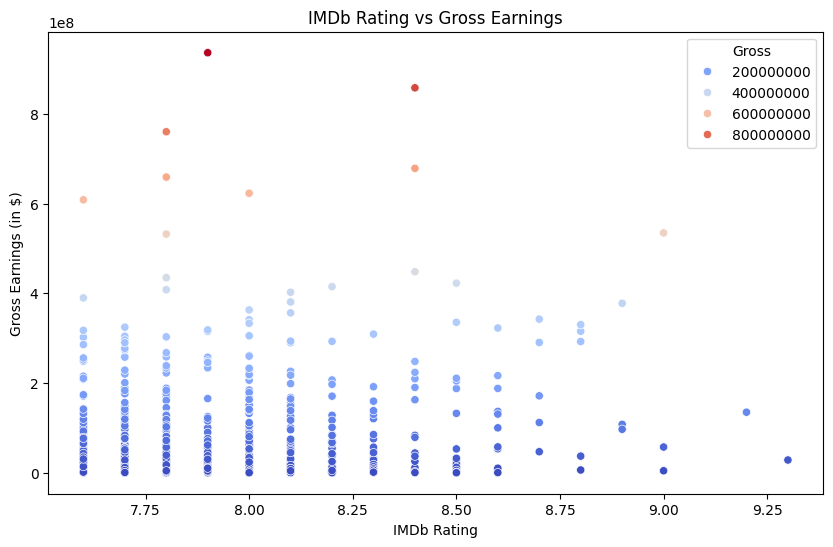

In [36]:
# Scatter plot of IMDb Rating vs Gross Earnings
plt.figure(figsize=(10, 6))
sns.scatterplot(data=imdb_df, x='IMDB_Rating', y='Gross', hue='Gross', palette='coolwarm')
plt.title('IMDb Rating vs Gross Earnings')
plt.xlabel('IMDb Rating')
plt.ylabel('Gross Earnings (in $)')
plt.show()

In [37]:
imdb_df['Genre'].str.split(',')

,Genre
0,[Drama]
1,"[Crime, Drama]"
2,"[Action, Crime, Drama]"
3,"[Crime, Drama]"
4,"[Crime, Drama]"
...,...
990,"[Drama, War, Western]"
991,"[Adventure, Comedy, War]"
992,"[Animation, Adventure, Family]"
994,"[Comedy, Music, Musical]"


In [38]:
genres_list = []
for genres in list(imdb_df['Genre'].str.split(',')):
    for genre in genres:
        genres_list.append(genre)
cleaned_genres = [genre.strip() for genre in genres_list]  # Removing leading/trailing spaces

genre_counts = {}
for genre in cleaned_genres:
    if genre not in genre_counts:
        genre_counts[genre]=1
    else:
        genre_counts[genre] = genre_counts[genre] + 1
genre_counts

{'Drama': 531,
 'Crime': 151,
 'Action': 143,
 'Adventure': 165,
 'Biography': 88,
 'History': 39,
 'Sci-Fi': 58,
 'Romance': 91,
 'Western': 16,
 'Fantasy': 55,
 'Comedy': 166,
 'Thriller': 104,
 'Animation': 64,
 'Family': 45,
 'War': 33,
 'Mystery': 73,
 'Music': 28,
 'Horror': 21,
 'Sport': 17,
 'Musical': 11,
 'Film-Noir': 8}

In [39]:
# Reverse sort dictionary based on values
sorted_genre_counts = dict(sorted(genre_counts.items(), key=lambda x: x[1], reverse=True))

# Print the sorted dictionary
print(sorted_genre_counts)

{'Drama': 531, 'Comedy': 166, 'Adventure': 165, 'Crime': 151, 'Action': 143, 'Thriller': 104, 'Romance': 91, 'Biography': 88, 'Mystery': 73, 'Animation': 64, 'Sci-Fi': 58, 'Fantasy': 55, 'Family': 45, 'History': 39, 'War': 33, 'Music': 28, 'Horror': 21, 'Sport': 17, 'Western': 16, 'Musical': 11, 'Film-Noir': 8}


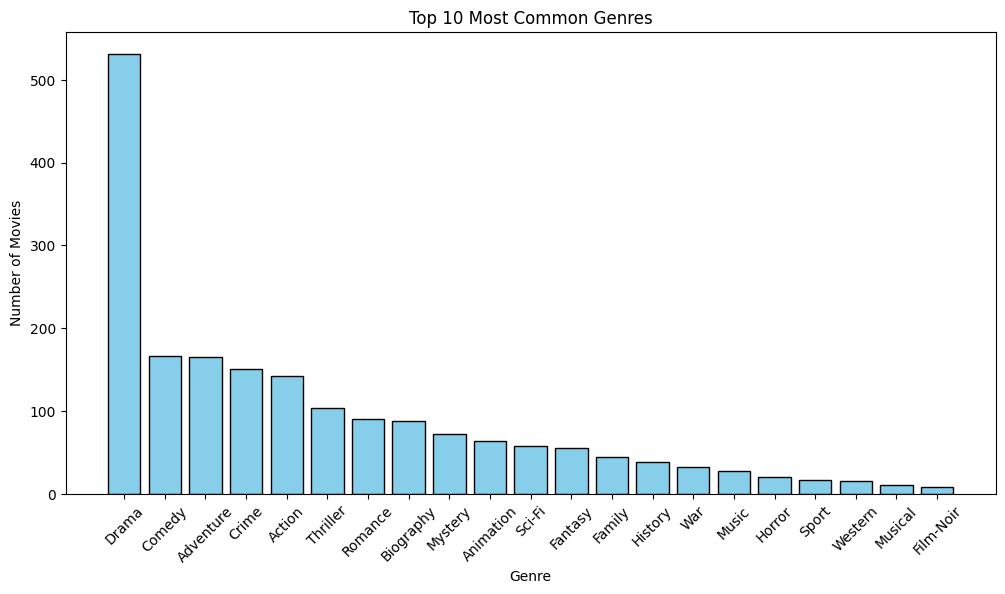

In [40]:
# Counting the most frequent genres
plt.figure(figsize=(12, 6))
plt.bar(list(sorted_genre_counts.keys()), list(sorted_genre_counts.values()), color='skyblue', edgecolor='black')
plt.title('Top 10 Most Common Genres')
plt.xlabel('Genre')
plt.ylabel('Number of Movies')
plt.xticks(rotation = 45)
plt.show()

Distribution of Movie Certificates

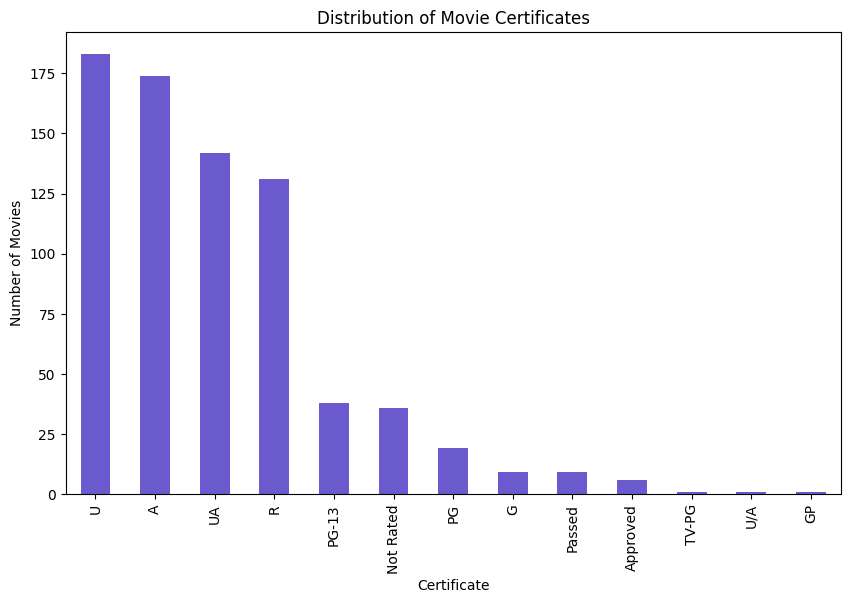

In [41]:
# Distribution of movie certificates
plt.figure(figsize=(10, 6))
imdb_df['Certificate'].value_counts().plot(kind='bar', color='slateblue')
plt.title('Distribution of Movie Certificates')
plt.xlabel('Certificate')
plt.ylabel('Number of Movies')
plt.show()

In [42]:
imdb_df.groupby('Director')['Gross'].sum()

,Gross
Director,
Abdellatif Kechiche,2199675
Abhishek Kapoor,1122527
Adam McKay,70259870
Akira Kurosawa,4501379
Alan J. Pakula,70600000
...,...
Yoshiaki Kawajiri,151086
Yôjirô Takita,1498210
Zack Snyder,318124738


In [43]:
imdb_df.groupby('Director')['Gross'].sum().nlargest(10)

,Gross
Director,
Steven Spielberg,2478133165
Anthony Russo,2205039403
Christopher Nolan,1937454106
James Cameron,1748236602
Peter Jackson,1597312443
J.J. Abrams,1423170905
Brad Bird,1099627795
Robert Zemeckis,1049446456
David Yates,978953721


Top 10 Directors by Total Gross Earnings

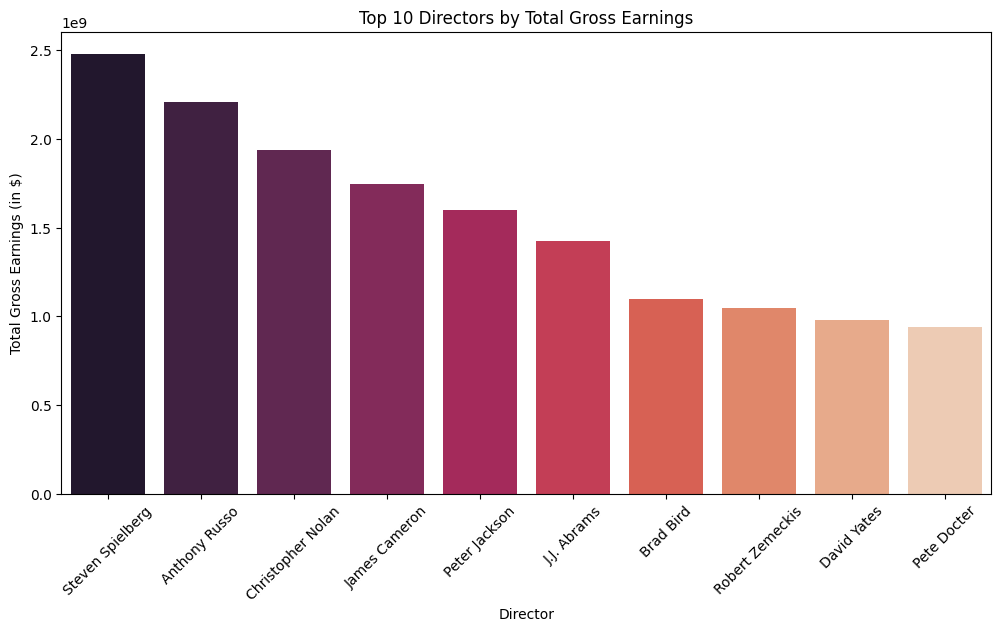

In [44]:
# Total gross earnings by director
director_gross = imdb_df.groupby('Director')['Gross'].sum().nlargest(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=director_gross.index, y=director_gross.values, palette='rocket')
plt.title('Top 10 Directors by Total Gross Earnings')
plt.xlabel('Director')
plt.ylabel('Total Gross Earnings (in $)')
plt.xticks(rotation=45)
plt.show()

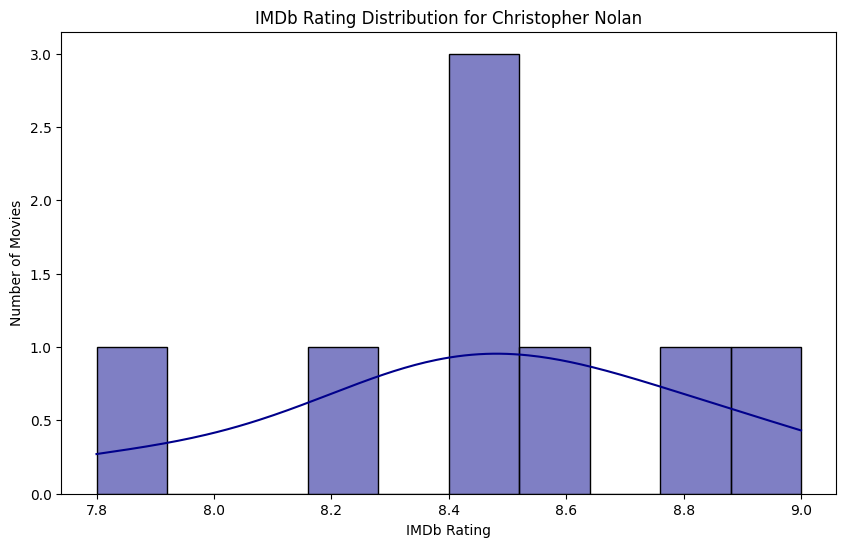

In [45]:
# Filter by a specific director (e.g., Christopher Nolan)
nolan_movies = imdb_df[imdb_df['Director'] == 'Christopher Nolan']

plt.figure(figsize=(10, 6))
sns.histplot(nolan_movies['IMDB_Rating'], bins=10, kde=True, color='darkblue')
plt.title('IMDb Rating Distribution for Christopher Nolan')
plt.xlabel('IMDb Rating')
plt.ylabel('Number of Movies')
plt.show()

Top 15 Directors

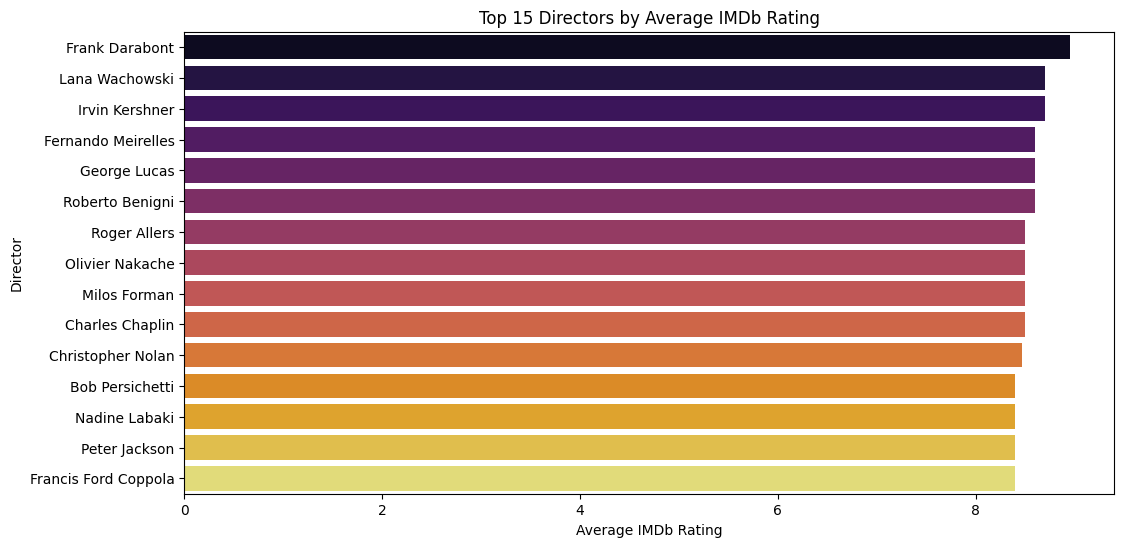

In [46]:
# Average IMDb rating by director
top_directors = imdb_df.groupby('Director')['IMDB_Rating'].mean().sort_values(ascending=False).head(15)

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(x=top_directors.values, y=top_directors.index, palette='inferno')
plt.title('Top 15 Directors by Average IMDb Rating')
plt.xlabel('Average IMDb Rating')
plt.ylabel('Director')
plt.show()

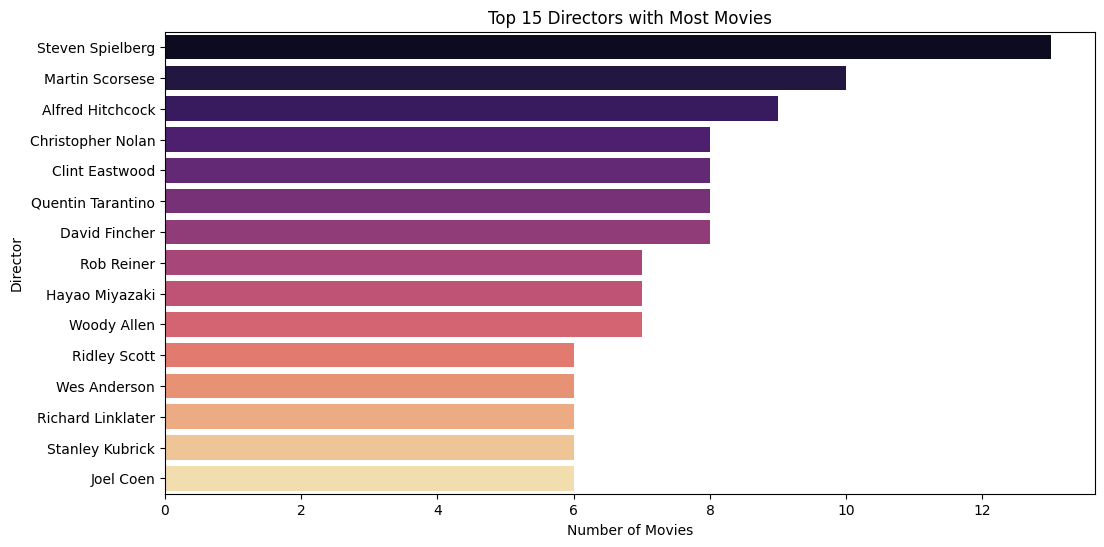

In [47]:
# Counting movies per director
director_counts = imdb_df['Director'].value_counts().head(15)

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(x=director_counts.values, y=director_counts.index, palette='magma')
plt.title('Top 15 Directors with Most Movies')
plt.xlabel('Number of Movies')
plt.ylabel('Director')
plt.show()

Top 20 Most Frequent Actors

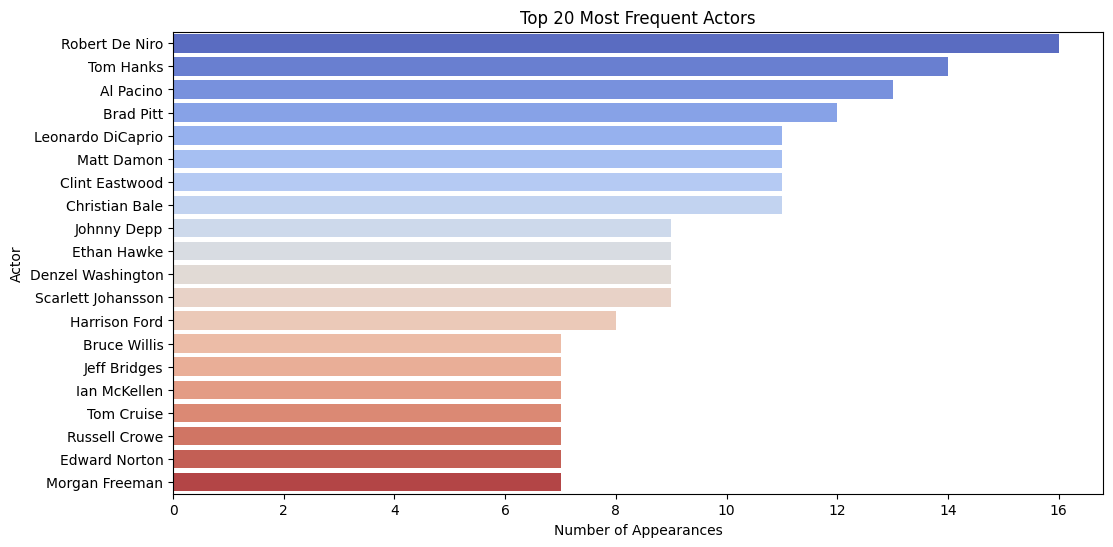

In [48]:
# Combining all actor columns into a single list
from collections import Counter

actors = pd.Series(imdb_df[['Star1', 'Star2', 'Star3', 'Star4']].values.ravel())
top_actors = actors.value_counts().head(20)

# Plotting most frequent actors
plt.figure(figsize=(12, 6))
sns.barplot(x=top_actors.values, y=top_actors.index, palette='coolwarm')
plt.title('Top 20 Most Frequent Actors')
plt.xlabel('Number of Appearances')
plt.ylabel('Actor')
plt.show()